In [1]:
from vivarium import Vivarium
from vivarium.tests import DEMO_PROCESSES

In [2]:
v = Vivarium(processes=DEMO_PROCESSES)

In [3]:
print('TYPES:')
v.print_types()
print('PROCESSES:')
v.print_processes()

TYPES:
['', '/length', 'current*time^2/length^2*mass', 'length*time/mass', '/temperature*time', 'current*length*time', 'mass/length*time^2', 'process', 'tuple', 'length*temperature', 'substance/length^3', 'maybe', 'current', 'length*mass/current^2*time^2', 'length^3/time', 'length^2*mass/current*time^3', 'mass/current*time^2', 'union', 'length^2*mass/time', 'length^2*mass/current^2*time^3', 'any', 'current*time/mass', 'length^2*mass/current^2*time^2', 'length^2*mass/substance*temperature*time^2', 'schema', 'mass/time^2', 'luminosity/length^2', 'length^0_5*mass^0_5/time', 'length^2', 'boolean', 'mass^0_5/length^1_5', 'length^3', 'mass/temperature^4*time^3', 'current^2*time^3/length^2*mass', 'length^2/time', 'protocol', 'current*length^2', '/substance', 'current*time/substance', 'length^4*mass/time^3', 'length^3*mass/current^2*time^4', 'length', 'substance/time', 'length^1_5*mass^0_5/time', 'interval', 'mass/length^3', 'length^3/mass*time^2', 'map', 'current^2*time^4/length^2*mass', 'mas

In [4]:
print("PROCESS CONFIG SCHEMA:")
print(v.process_schema('increase'))
print("PROCESS INTERFACE SCHEMA:")
print(v.process_interface('increase'))

PROCESS CONFIG SCHEMA:
(rate:float)
PROCESS INTERFACE SCHEMA:
{'inputs': {'level': 'float'}, 'outputs': {'level': 'float'}}


In [5]:
v.add_process(name='increaseA',                    
              process_id='increase',
              config={'rate': 1.1},
              # inputs=None,
              # outputs=None,
              # path=None
              )

In [6]:
print(v)

Vivarium( 
{ 'global_time': 0.0,
  'increaseA': { 'address': 'local:increase',
                 'config': {'rate': 1.1},
                 'inputs': {},
                 'instance': <vivarium.tests.IncreaseProcess object at 0x108002a00>,
                 'interval': 1.0,
                 'outputs': {}}})


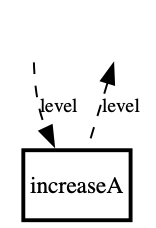

In [7]:
v.diagram(dpi='140')

In [8]:
v.connect_process(
    process_name='increaseA', 
    inputs={'level': ['top', 'level in']}, 
    outputs={'level': ['top', 'level out']}
)

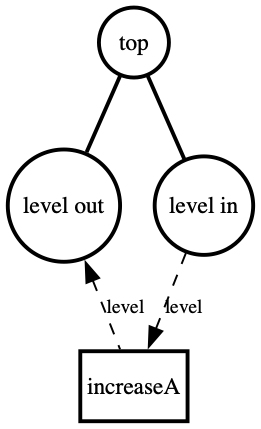

In [9]:
v.diagram(dpi='140')

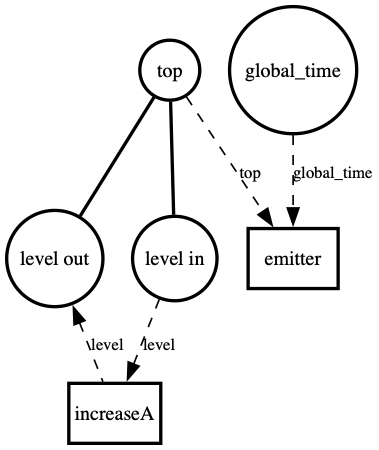

In [10]:
# add an emitter
v.add_emitter()
# print(v)
v.diagram(dpi='120')

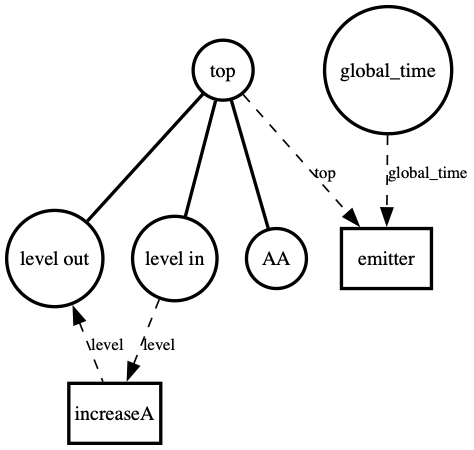

In [11]:
# add more states
v.add_object(name='AA', path=['top'], value=1)
v.diagram(dpi='120')

In [12]:
print(v)

Vivarium( 
{ 'emitter': { 'address': 'local:ram-emitter',
               'config': {'emit': {'global_time': 'any', 'top': 'any'}},
               'inputs': {'global_time': ['global_time'], 'top': ['top']},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x108351cd0>,
               'outputs': None},
  'global_time': 0.0,
  'increaseA': { 'address': 'local:increase',
                 'config': {'rate': 1.1},
                 'inputs': {'level': ['top', 'level in']},
                 'instance': <vivarium.tests.IncreaseProcess object at 0x108002a00>,
                 'interval': 1.0,
                 'outputs': {'level': ['top', 'level out']}},
  'top': {'AA': None, 'level in': 0.0, 'level out': 0.0}})


In [13]:
v.save(filename='demo1')

Created new file: /Users/eranagmon/code/vivarium-interface/vivarium/notebooks/out/demo1.json


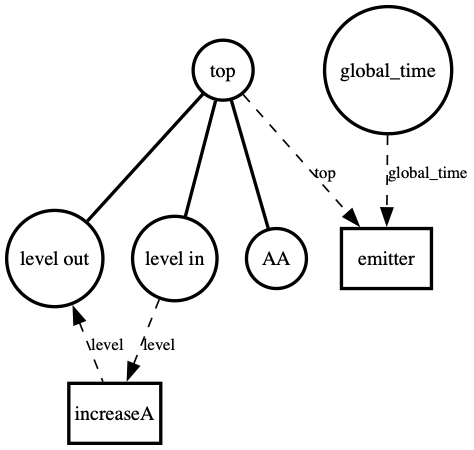

In [15]:
v2 = Vivarium(document_path='out/demo1.json', processes=DEMO_PROCESSES)
v2.diagram(dpi='120')

In [16]:
v2

Vivarium( 
{ 'emitter': { 'address': 'local:ram-emitter',
               'config': {'emit': {'global_time': 'any', 'top': 'any'}},
               'inputs': {'global_time': ['global_time'], 'top': ['top']},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x10837d250>,
               'outputs': {}},
  'global_time': '0.0',
  'increaseA': { 'address': 'local:increase',
                 'config': {'rate': 1.1},
                 'inputs': {'level': ['top', 'level in']},
                 'instance': <vivarium.tests.IncreaseProcess object at 0x109004c70>,
                 'interval': 1.0,
                 'outputs': {'level': ['top', 'level out']}},
  'top': {'AA': 'None', 'level in': '0.0', 'level out': '0.0'}})